In [43]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.util import ngrams
from sklearn.metrics import pairwise
stemmer = SnowballStemmer('spanish')

In [44]:
import re

In [45]:
first_paragraph = "Esta es una prueba. De los famosos n-gramas. Se esta usando NLTK."

second_paragraph = "Esta es otra prueba. Esto es para el ejercicio. Usando n-gramas en clase."

In [46]:
def stem_paragraph(paragraph):
  paragraph = paragraph.lower()
  words = set(re.findall(r"\w+", paragraph))
  # MOD --> words = set(re.findall(r'\w+|[^\w\s]', paragraph))
  paragraph = ' '.join([stemmer.stem(word) for word in words])
  return paragraph

In [47]:
# parrafos = [first_paragraph, second_paragraph]
# pre_procesados = [stem_paragraph(parrafo) for parrafo in parrafos]
# print(pre_procesados)

In [48]:
# return a list of all the ngrams, taking as input the number of connected string of n elements
def make_ngrams(paragraph, n):
  words = re.findall(r"\w+", paragraph)
  n_grams = ngrams(words, n)
  return [' '. join(ngram) for ngram in n_grams]

In [49]:
# 1. make ngrams of the two paragraphs of n length
# 2. make a set of the ngrams from both paragraphs
# 3. compare if the ngram is present in the paragraph1
# 4. if the ngram is present then add to the list a 1, else add 0
# 5. compare if the ngram is present in the paragraph2
# 6. if the ngram is present then add to the list a 1, else add 0
# 7. combine lists to make matrix to get cosine similarity
def make_matrix_two_paragraphs_ngrams(paragraph1, paragraph2, n):
  paragraph1_ngrams = make_ngrams(paragraph1, n)
  paragraph2_ngrams = make_ngrams(paragraph2, n)
  list_of_sentences = [' '.join(paragraph1_ngrams), ' '.join(paragraph2_ngrams)]
  combined_ngrams = set(paragraph1_ngrams + paragraph2_ngrams)
  matrix = []
  for sentence in list_of_sentences:
    lista = []
    for word in combined_ngrams:
      if word in sentence:
        lista.append(1)
      else:
        lista.append(0)
    matrix.append(lista)

  return(matrix)

In [50]:
def get_cosine_similarity_ngrams(paragraph1, paragraph2, n):

  matrix = make_matrix_two_paragraphs_ngrams(paragraph1, paragraph2, n)


  similarity_paragraphs = pairwise.cosine_similarity(matrix)
  print(f"The cosine similarity between the two paragraphs with ngrams={n} is: {similarity_paragraphs[0][1]}")

In [51]:
first_paragraph_stemmed = stem_paragraph(first_paragraph)
first_paragraph_stemmed

'es nltk n famos una esta de usand gram los se prueb'

In [52]:
second_paragraph_stemmed = stem_paragraph(second_paragraph)
second_paragraph_stemmed

'es esto n en ejercici el esta otra usand gram clas par prueb'

In [53]:
get_cosine_similarity_ngrams(first_paragraph_stemmed, second_paragraph_stemmed, 1)

The cosine similarity between the two paragraphs with ngrams=1 is: 0.4803844614152615


In [54]:
get_cosine_similarity_ngrams(first_paragraph_stemmed, second_paragraph_stemmed, 2)

The cosine similarity between the two paragraphs with ngrams=2 is: 0.08703882797784893


In [55]:
get_cosine_similarity_ngrams(first_paragraph_stemmed, second_paragraph_stemmed, 3)

The cosine similarity between the two paragraphs with ngrams=3 is: 0.0


In this case, since it is a very short text that does not need much context, we consider that the unigram is better, because it was more effective in finding the similarity between the paragraphs. Furthermore, due to the lack of complexity, it´s not necessary to do the analysis with a bigram or trigram.

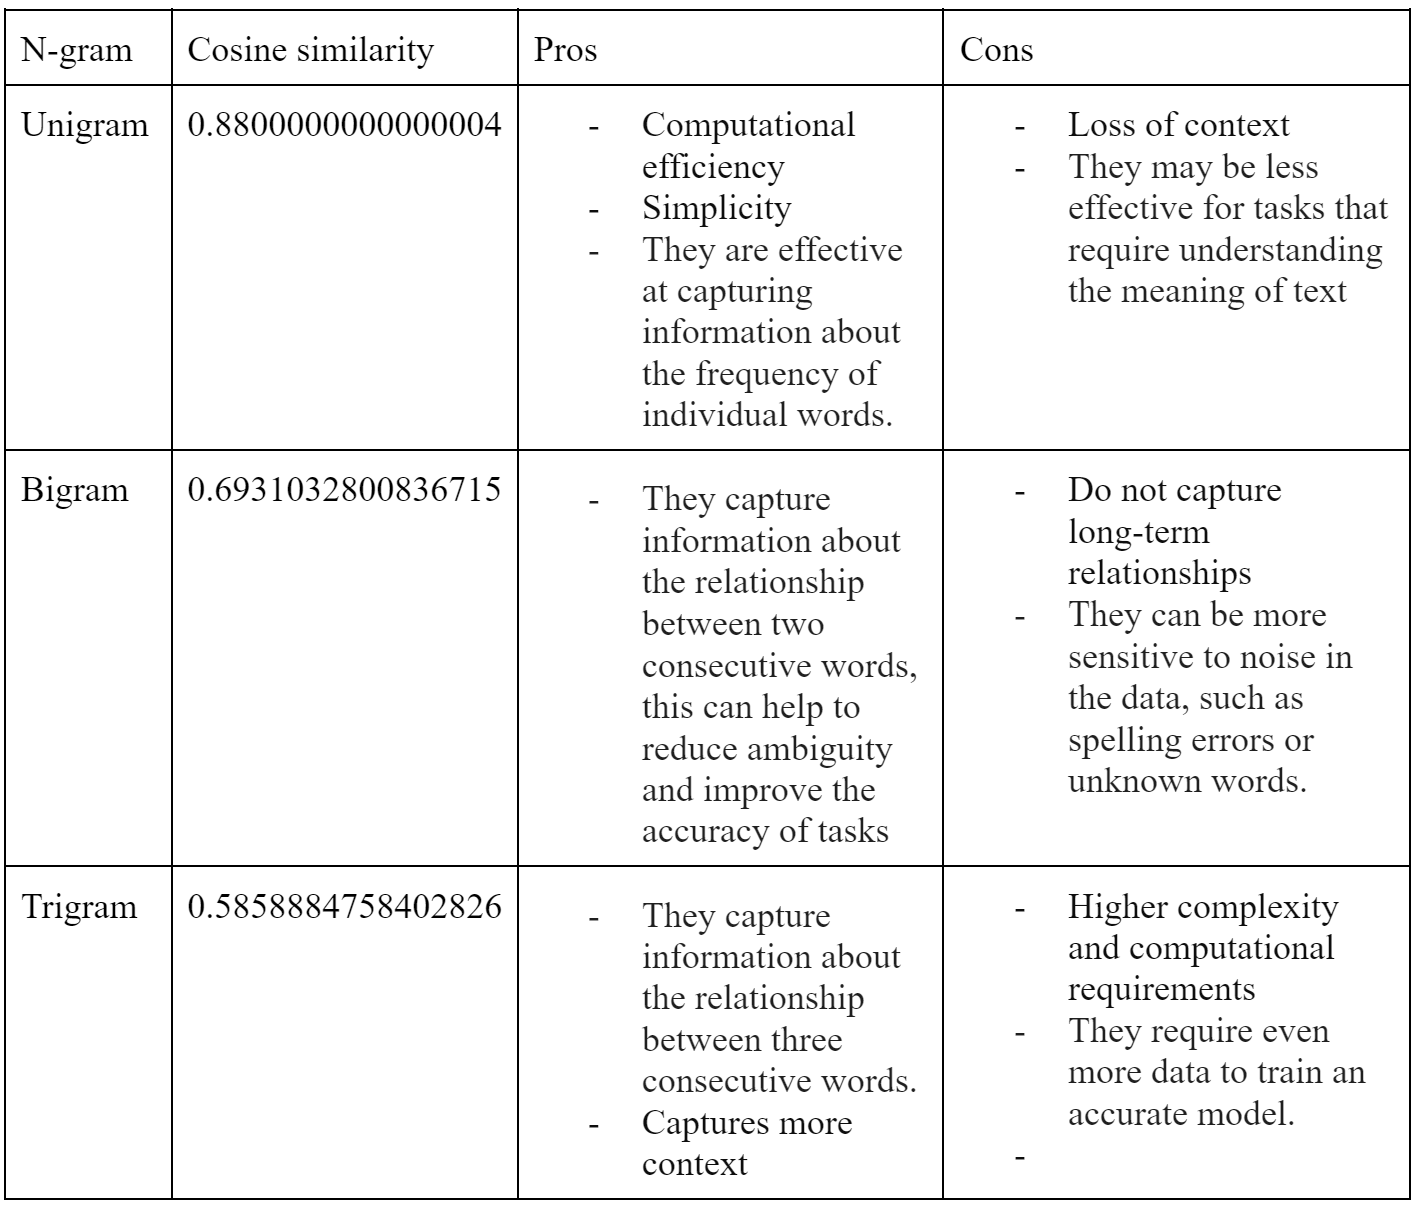